# Quantitative Research Analysis Report

The project was published at [my Github repository](https://github.com/thanhhoa214/swin-mfp30002-assignment/blob/main/Assignment2.ipynb). Please check it for better visualisation quality.

## Scope
### 1. Selected country names

| -- | -- | -- | -- | -- |
| --- | --- | --- | --- | --- |
| Argentina | Australia | Belgium | Canada | China |
| Colombia | Costa Rica | Croatia | Denmark | Egypt, Arab Rep. | 
| Finland | France | Germany | Hungary | Thailand | 
| Ukraine | United Kingdom | United States | Uruguay | Vietnam |

### 2. Factors

| Factor | Description |
| --- | --- |
| CO2 Emissions (kt) | This metric measures a country's carbon dioxide emissions, a crucial indicator of its environmental impact and commitment to sustainability. |
| GDP (current US$) | Gross Domestic Product reflects a nation's economic performance and overall prosperity. It's a fundamental measure of a country's financial health. |
| Exports of Goods and Services (% of GDP) | The percentage of GDP represented by exports reveals a country's international trade prowess and global economic integration. |
| Urban Population | The extent of urbanization within a nation signifies shifts in demographics and development patterns, impacting various aspects of life. |
| Unemployment, Total (% of Total Labor Force) (National Estimate) | This factor offers insights into a country's labor market dynamics, workforce stability, and economic resilience. |

### 3. Researched year

2018

### 4. General description

In this data analysis study, I examine the correlations between important variables that affect a country's development and sustainability while delving into the economic and environmental elements of a number of nations via five variables above.
The codes nested with the visualization to reflect the data and its formula to build up the charts. 
- 5 individual charts to show 5 factors for countries
- A map chart adheres with a sorted bar chart showing GDP of countries
- A correlation table and heatmap for illustrating the correlation between 5 variables to each others
- A scatterplot of "CO2 emissions (kt)" versus "Urban population" relationship with linear regression integrated
- A scatterplot of "Exports of goods and services (% of GDP)" versus "Unemployment, total (% of total labor force) (national estimate)" relationship
- A scatterplot of "Urban population" versus "Unemployment, total (% of total labor force) (national estimate)" relationship

In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dataset = pd.read_csv('./P_Data_Extract_From_World_Development_Indicators/cdaa8ed4-c082-4061-a504-d4f1db4c1726_Data.csv')
dataset

,Country Name,Country Code,Series Name,Series Code,2018 [YR2018]
0,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,5.248199e+11
1,Argentina,ARG,CO2 emissions (kt),EN.ATM.CO2E.KT,1.768946e+05
2,Argentina,ARG,Urban population,SP.URB.TOTL,4.087710e+07
3,Argentina,ARG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,9.220000e+00
4,Argentina,ARG,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,1.443669e+01
...,...,...,...,...,...
100,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
103,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


In [3]:
countries_df = dataset[['Country Code', 'Country Name']]
dataset.dropna(inplace=True)
dataset.drop(columns=['Country Code', 'Series Code'], inplace=True)
# Use 'Country Name' as index column and 'Series Name' 
dataset = dataset.pivot_table(index=dataset['Country Name'], columns=['Series Name'])['2018 [YR2018]']

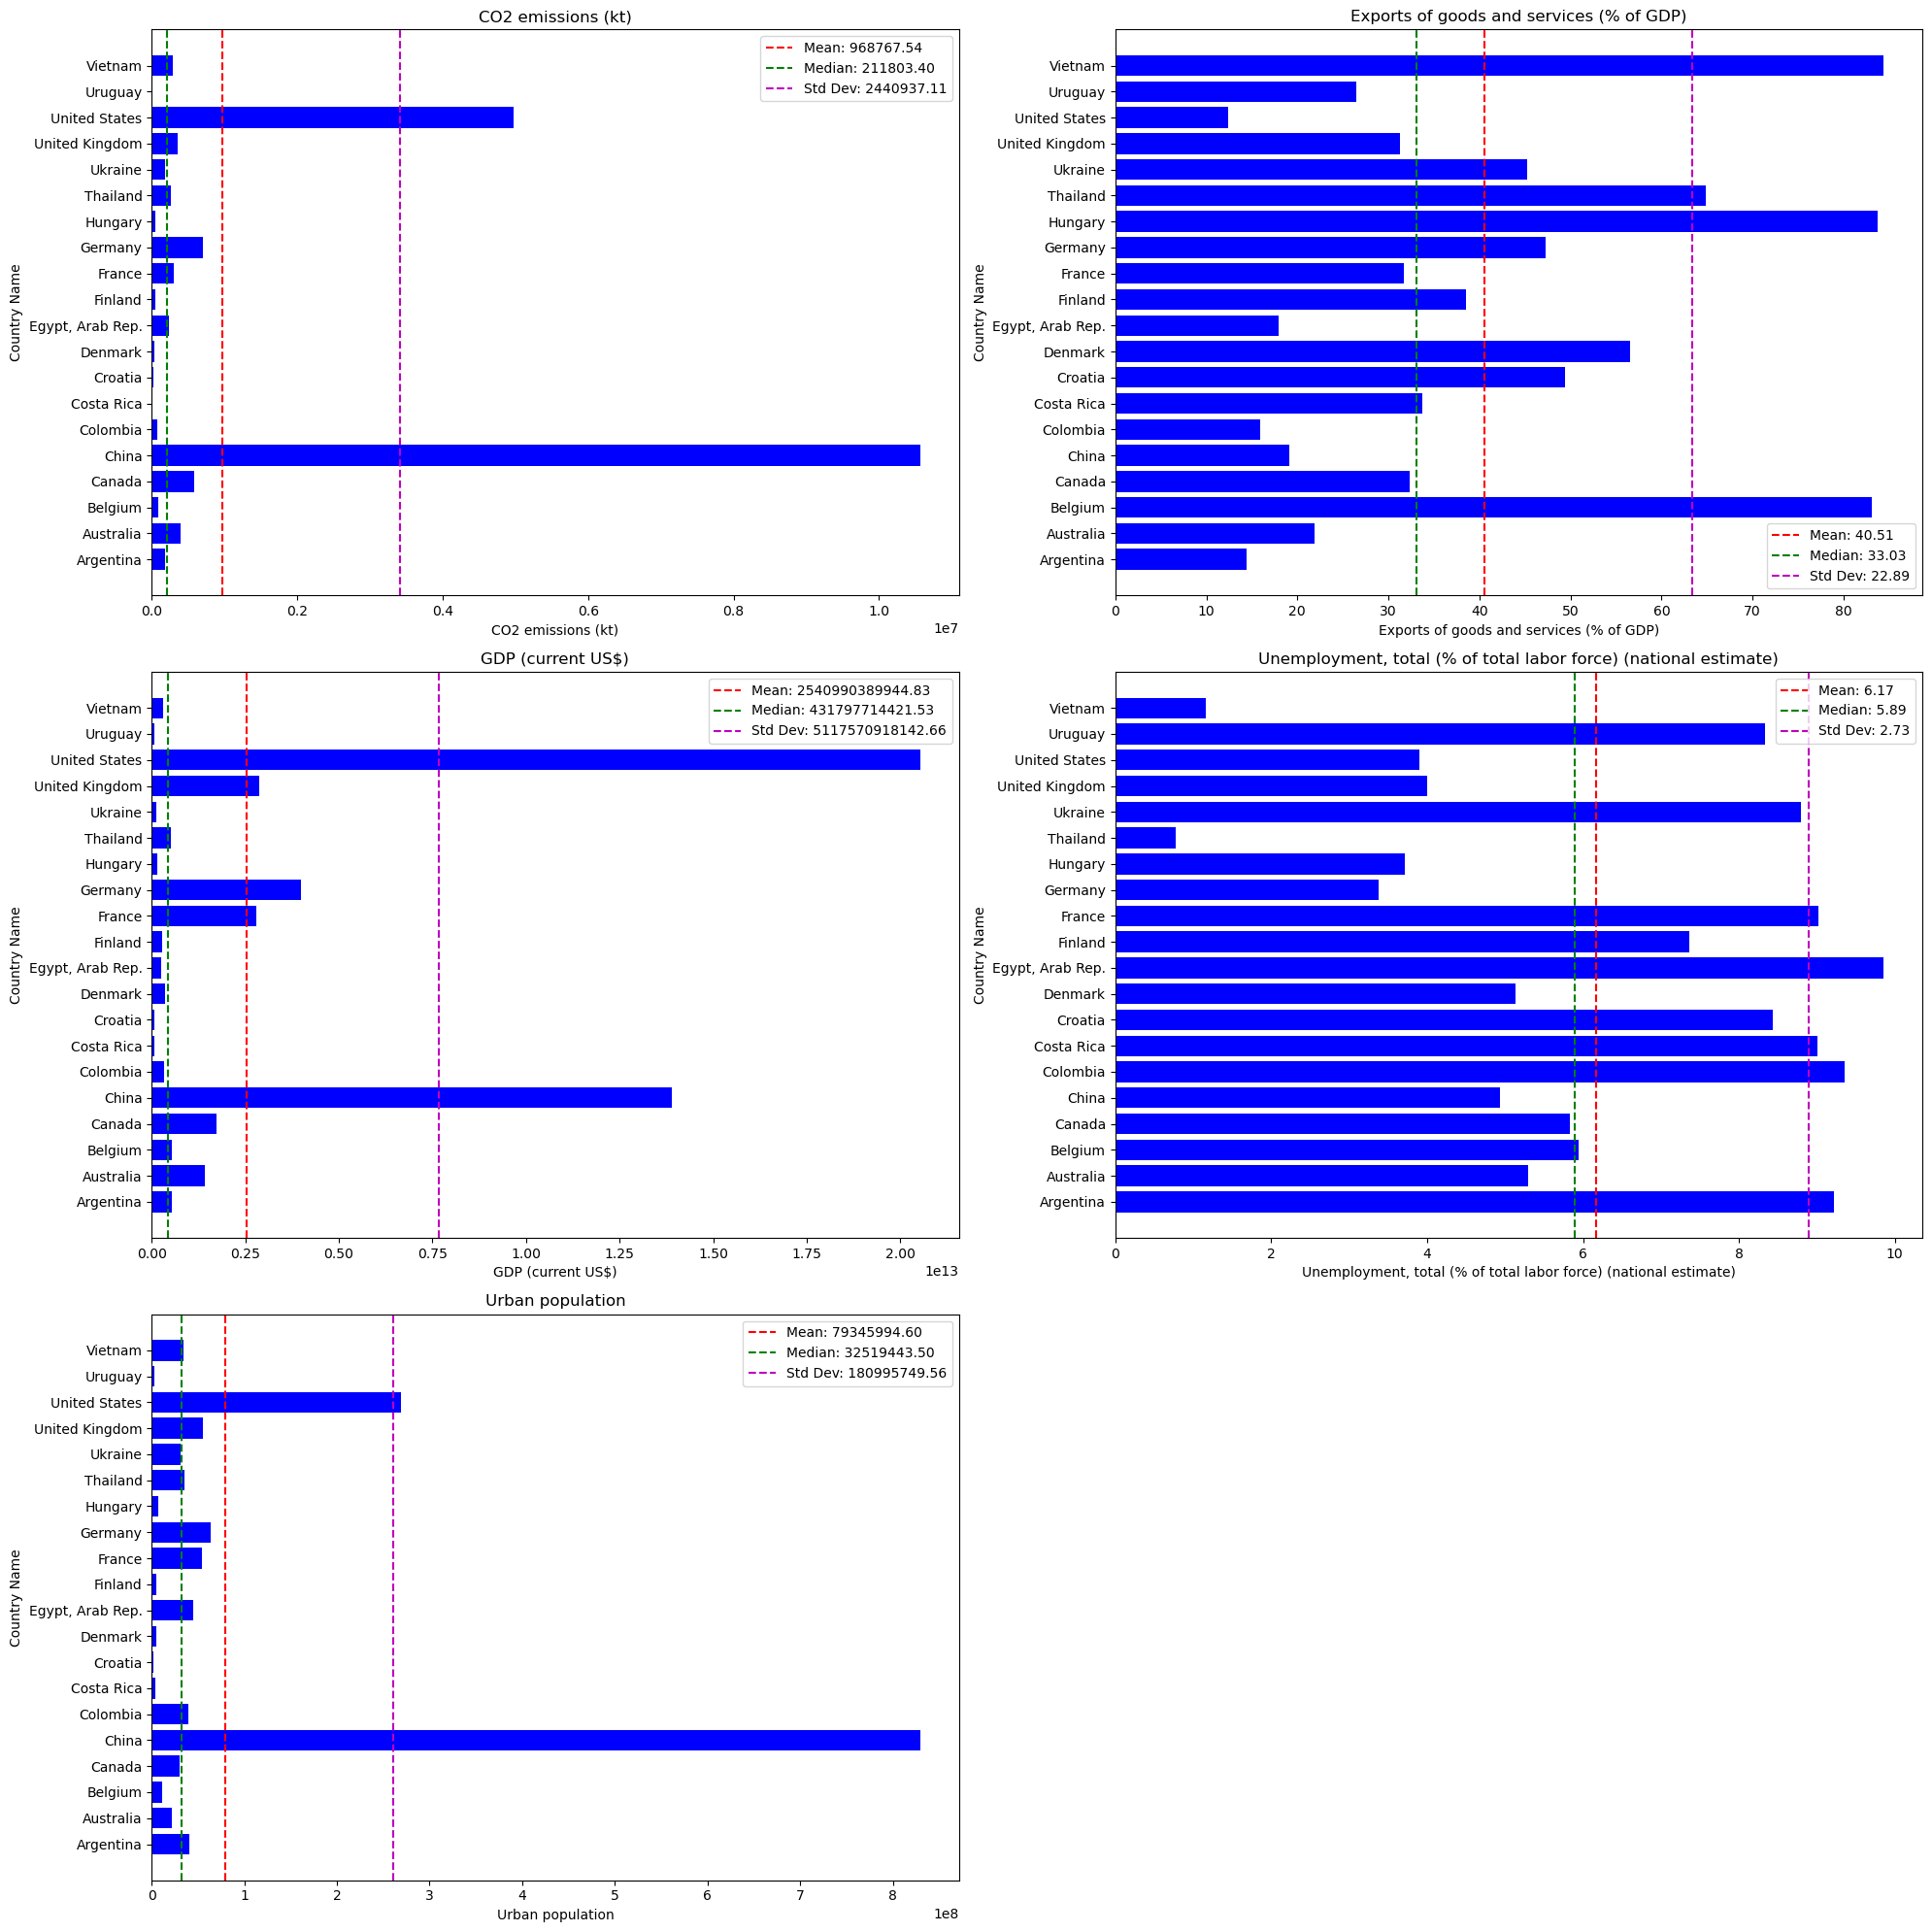

In [4]:
# Create a figure with 5 subplots (axes)
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

# Plot each field on a separate subplot
fields = ['CO2 emissions (kt)', 'Exports of goods and services (% of GDP)', 
          'GDP (current US$)', 'Unemployment, total (% of total labor force) (national estimate)', 
          'Urban population']

for i, field in enumerate(fields):
    index = math.floor(i / 2)
    sub_index = i % 2
    ax = axes[index][sub_index]
    ax.barh(dataset.index, dataset[field], color='b')
    ax.set_title(field)
    ax.set_xlabel(field)
    ax.set_ylabel('Country Name')

    # Calculate statistics
    mean_value = np.mean(dataset[field])
    median_value = np.median(dataset[field])
    std_dev = np.std(dataset[field])

    # Plot lines for statistics
    ax.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax.axvline(median_value, color='g', linestyle='--', label=f'Median: {median_value:.2f}')
    ax.axvline(mean_value + std_dev, color='m', linestyle='--', label=f'Std Dev: {std_dev:.2f}')
    ax.legend()

axes[2][1].remove()
plt.tight_layout()
plt.show()

When we take an overall look on the dataset via five plotted fields, we can see that the only unemployment rate is kept the comparable numbers between countries and also the mean and median are close together. All governments strive to achieve low and steady unemployment since doing so helps to secure a nation's economic stability and well-being. Vietnam's GDP and unemployment rate statistics demonstrate why this country competes with the top 3 countries for FDI in 2020 and 2021 following by [The Malaysian Reserve](https://themalaysianreserve.com/)[1].

![FDI inflows](fdi_inflows.jpeg)

**Reference**

[1] BIRRUNTHA, S. (2022, December 5). Asean FDI surges 42%, back to pre-pandemic level. *The Malaysian Reserve*. https://themalaysianreserve.com/2022/12/05/asean-fdi-surges-42-back-to-pre-pandemic-level/

In [5]:
import geopandas as gpd

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/83/4mfm8bk96q5fmz8fh5c7bpdm0000gn/T/ipykernel_54368/236110360.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


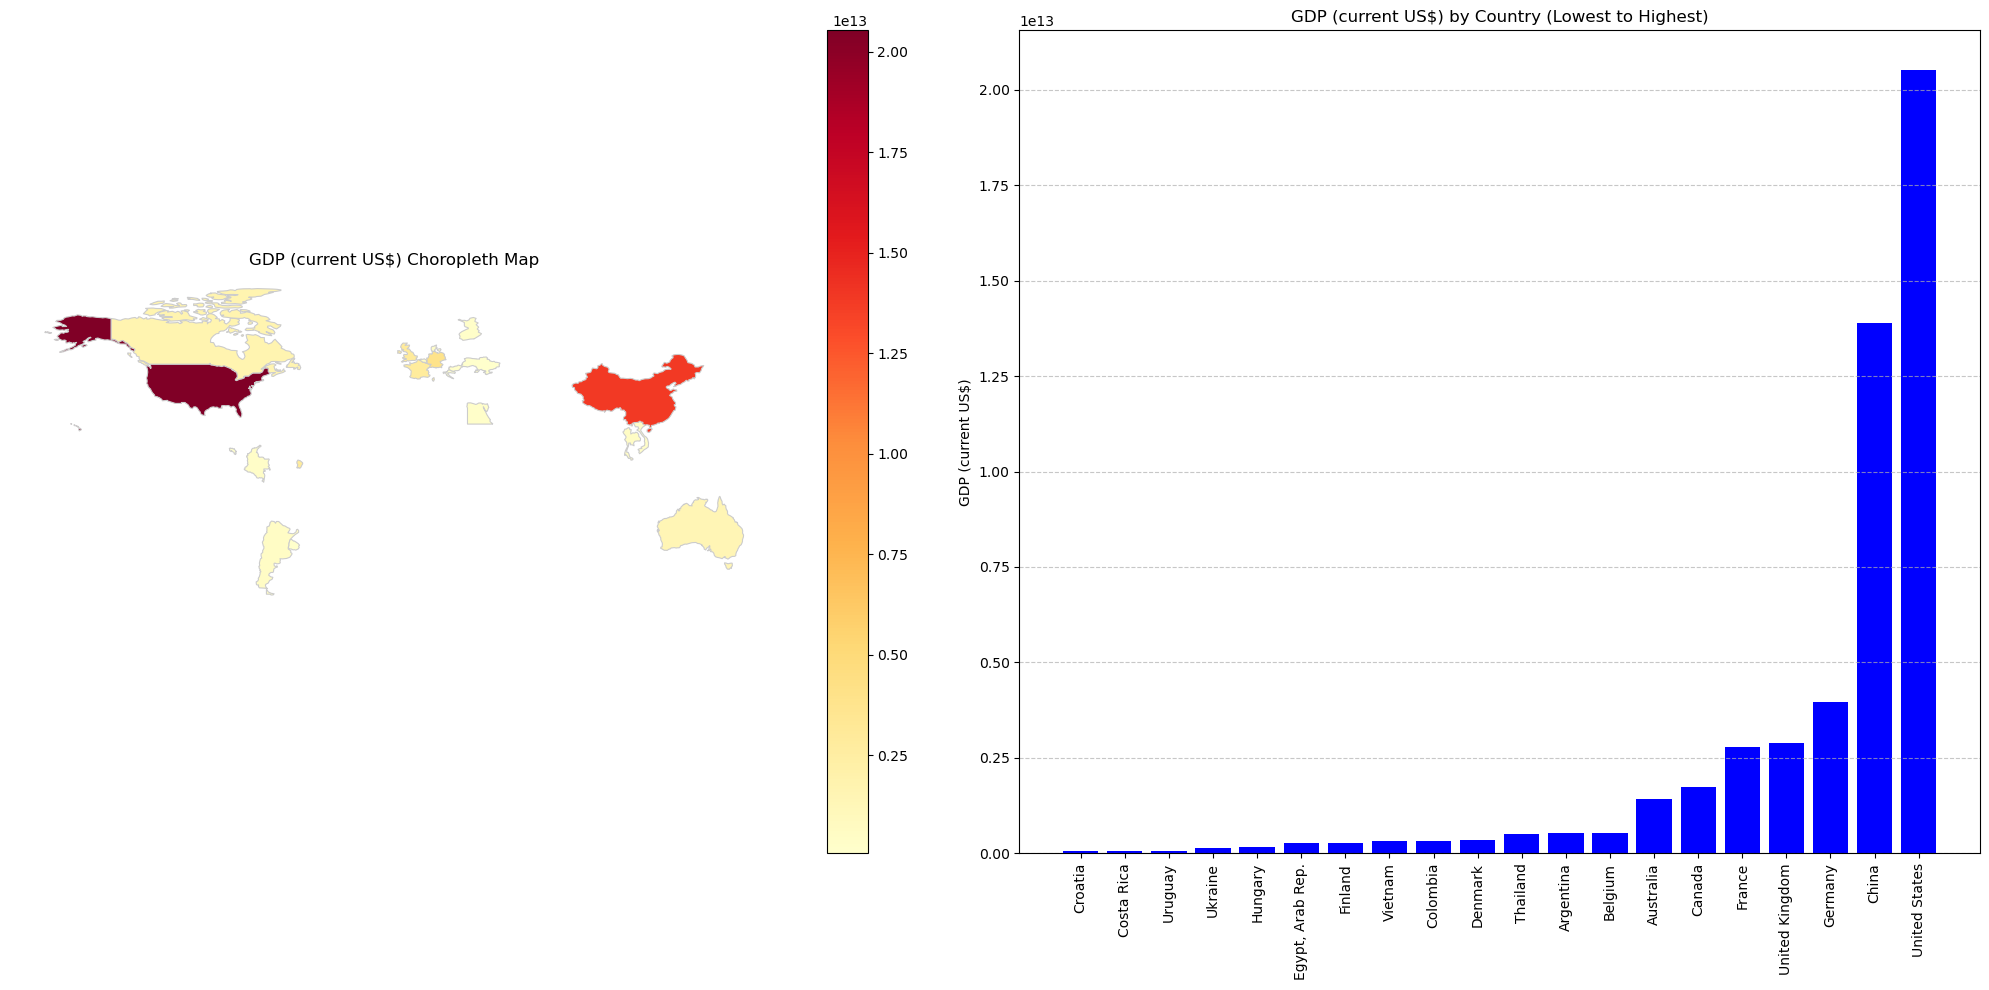

In [66]:
dataset_with_country = dataset.reset_index()
dataset_with_country_code = countries_df[['Country Name', 'Country Code']].dropna().drop_duplicates().reset_index()
dataset_with_country_combined = dataset_with_country.merge(dataset_with_country_code, on='Country Name', how='inner')

# Merge the world shapefile with the merged dataset
merged_data = world.merge(dataset_with_country_combined, left_on='iso_a3', right_on='Country Code', how='inner')

# Plot the choropleth map
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Left subplot: Choropleth Map
ax[0].axis('off')  # Turn off axis

# Choose the column for coloring the map (e.g., 'CO2 Emissions (kt)')
column_to_plot = 'GDP (current US$)'
missing_color = 'lightgray'

merged_data.plot(column=column_to_plot, cmap='YlOrRd', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True, missing_kwds={'color': missing_color})

# Add a title to the left subplot
ax[0].set_title('GDP (current US$) Choropleth Map')

# Right subplot: Column Chart
sorted_dataset = dataset_with_country_combined[['Country Name', column_to_plot]].sort_values(by=column_to_plot, ascending=True)

ax[1].bar(sorted_dataset['Country Name'], sorted_dataset[column_to_plot], color='b')
ax[1].set_ylabel(column_to_plot)  # Use y-label for GDP
ax[1].set_title(f'{column_to_plot} by Country')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
ax[1].set_title(f'{column_to_plot} by Country (Lowest to Highest)')

# Show the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Correlation

The negative correlation marks at `-0.527629` implies that there is a considering relationship between a country's export performance and its unemployment rate. It could be presented as the less unemployment rate or the more people has worked in the economy will lead the 

In [7]:
dataset.corr()

Series Name,CO2 emissions (kt),Exports of goods and services (% of GDP),GDP (current US$),"Unemployment, total (% of total labor force) (national estimate)",Urban population
Series Name,,,,,
CO2 emissions (kt),1.000000,-0.326759,0.826724,-0.207411,0.987342
Exports of goods and services (% of GDP),-0.326759,1.000000,-0.387301,-0.527629,-0.317038
GDP (current US$),0.826724,-0.387301,1.000000,-0.270719,0.742504
"Unemployment, total (% of total labor force) (national estimate)",-0.207411,-0.527629,-0.270719,1.000000,-0.170048
Urban population,0.987342,-0.317038,0.742504,-0.170048,1.000000


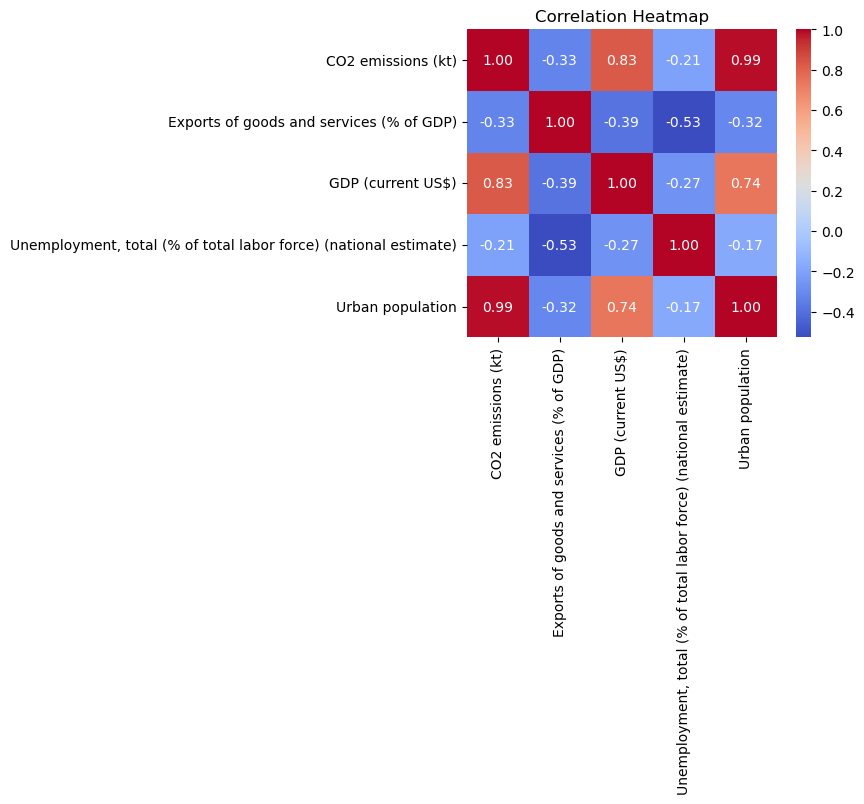

In [8]:
# Create a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xlabel('')
plt.ylabel('')
plt.show()

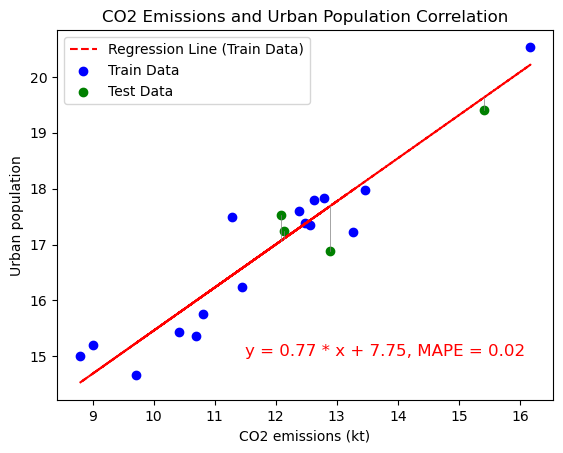

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# Fit a linear regression model to the training data
x_train, x_test, y_train, y_test = train_test_split(
    np.log(dataset['CO2 emissions (kt)']), np.log(dataset['Urban population']), test_size=0.2, random_state=42)

coeff = np.polyfit(x_train, y_train, 1)
line = coeff[0] * x_train + coeff[1]

# Calculate the predicted values for the test set
y_pred = coeff[0] * x_test + coeff[1]

# Calculate the MAPE for the test set
mse = mean_absolute_percentage_error(y_test, y_pred)

plt.title('CO2 Emissions and Urban Population Correlation')
plt.xlabel('CO2 emissions (kt)')
plt.ylabel('Urban population')
# Plot the regression line for the training data
plt.plot(x_train, line, color='red', linestyle='--', label=f'Regression Line (Train Data)')

# Plot the training data points in blue
plt.scatter(x_train, y_train, c='blue', marker='o', label='Train Data')

# Plot the test data points in green
plt.scatter(x_test, y_test, c='green', marker='o', label='Test Data')

# Connect the test data points to the regression line
for i in range(len(x_test)):
    plt.plot([x_test[i], x_test[i]], [y_test[i], y_pred[i]], color='gray', linestyle='-', linewidth=0.5)

# Add label for the line formula and MSE
formula_label = f'y = {coeff[0]:.2f} * x + {coeff[1]:.2f}, MAPE = {mse:.2f}'
plt.text(11.5, 15, formula_label, color='red', fontsize=12)

plt.legend()


#### "CO2 emissions (kt)" versus "Urban population" relationship
With a correlation value of `0.987342`, the association between "CO2 emissions (kt)" and "Urban population" is exceptionally strong. This high ratio shows that when urban population grows, CO2 emissions also grow significantly, showing a clear and significant relationship between these two factors. The explanation for this is obvious: "Urban population" refers to both the population of the country as a whole and to those living or working in urban areas, which increases the amount of CO2 released into the atmosphere.

From this, it can form a rough linear regression model between two variables with the train/test ratio is `8/2` to check. The result of the MAPE  counted approximately `2%` is very good based on the MAPE table referenced by [Stephen Allwright](https://stephenallwright.com/author/stephen/) - a Data Scientist at his blog about [What is a good MAPE score?](https://stephenallwright.com/good-mape-score/).

MAPE | Interpretation
--- | ---
|< 10% | Very good |
|10% - 20% | Good |
|20% - 50% | OK |
|> 50% | Not good |

In [13]:
def scatterFields(first_field, second_field):
    plt.figure(figsize=(8, 6))
    plt.scatter(np.log(dataset[first_field]), np.log(dataset[second_field]), c='blue', marker='o')
    plt.title(f'"{first_field}" and "{second_field}" Correlation')
    plt.xlabel(first_field)
    plt.ylabel(second_field)
    plt.grid(True)
    plt.show()

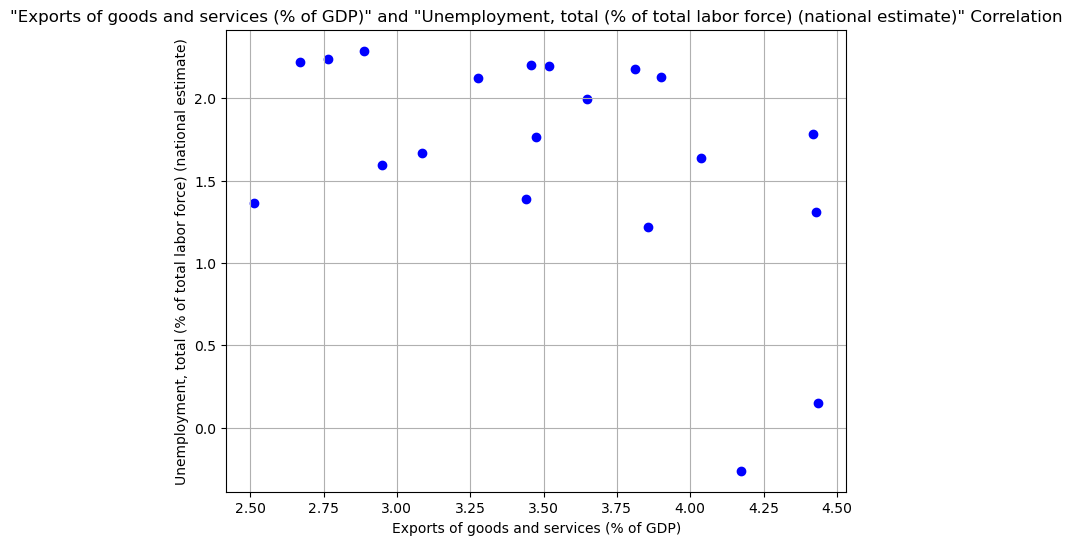

In [14]:
scatterFields('Exports of goods and services (% of GDP)', 'Unemployment, total (% of total labor force) (national estimate)')

#### "Exports of goods and services (% of GDP)" versus "Unemployment, total (% of total labor force) (national estimate)" relationship
The negative correlation of `-0.527629` suggests a notable connection between a nation's export performance and its unemployment rate. In simpler terms, as a country's unemployment rate decreases (indicating more people employed), it tends to produce a greater volume of goods and services. This observation focuses on percentages so this means when a country experiences lower unemployment, its domestic demand often rises, reducing the need for urgent exports. One of the reasons could be the government tries to keep the economic stability.

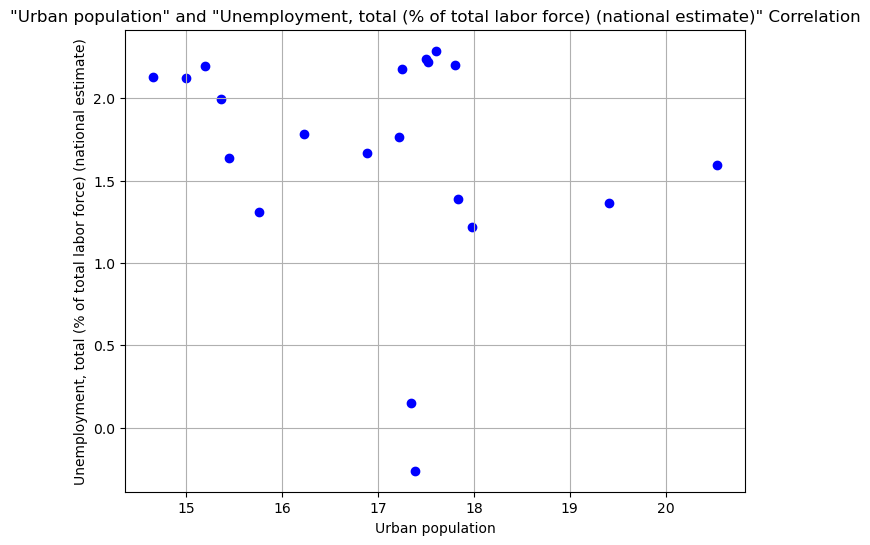

In [15]:
scatterFields('Urban population', 'Unemployment, total (% of total labor force) (national estimate)')

#### "Urban population" versus "Unemployment, total (% of total labor force) (national estimate)" relationship
Urban population and unemployment rate have the poorest relationship among the five factors taken into consideration, with a correlation coefficient of `-0.170048`. People often assume that there is a significant connection between these two, but in reality, when more individuals choose to live in metropolitan areas, the unemployment rate just modestly declines. The chart demonstrates how disparate it is, and one explanation may be that the government's policies have a significant impact on unemployment rates in rural areas but have less of an impact on urban areas due to factors like infrastructure development, modernization, and weather. A variety of other circumstances can influence both variables, thus the link is not strong enough.